In [1]:
%load_ext autoreload
%autoreload 2 

In [503]:
import inspyhep
from inspyhep.inspires_tools import InspiresRecord
from inspyhep.author import Author

import matplotlib.pyplot as plt
import numpy as np

## Let's start by looking at individual records

In [555]:
SM_paper = InspiresRecord('Weinberg:1967tq')

In [556]:
print(SM_paper)

print("citation_count:", SM_paper.citation_count)
print("authorlist_bibtex_style:", SM_paper.authorlist_bibtex_style)
print("date:", SM_paper.date)
print("arxiv_number:", SM_paper.arxiv_number)
print("published:", SM_paper.published)
print("pub_title:", SM_paper.pub_title)
print("title:", SM_paper.title)

Weinberg, Phys.Rev.Lett. 19 (1967), 1967.
citation_count: 13659
authorlist_bibtex_style: Weinberg, Steven
date: 1967-11-01
arxiv_number: None
published: True
pub_title: Phys.Rev.Lett.
title: A Model of Leptons


## Comprehensive author information

In [557]:
SW = Author('Steven.Weinberg.1')

In [559]:
# Total number of citations
SW.citations

90092

## Let's plot some citation metrics to compare with Inspires

In [561]:
years = range(1959, 2021)
citations = []
citations_noself = []
self_citations = []
kwargs = {'max_nauthors': 10}
for y in years:
    citations.append(SW.get_total_number_of_citations(SW.inspires_records, in_year = y, self_cite=True, **kwargs))
    citations_noself.append(SW.get_total_number_of_citations(SW.inspires_records, in_year = y, self_cite=False, **kwargs))
    self_citations.append(citations[-1] - citations_noself[-1])

Text(0, 0.5, 'citations')

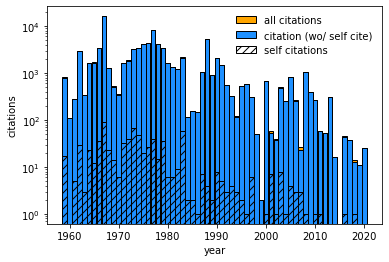

In [562]:
plot_kwargs = {'width': 0.95}
plt.bar(years, citations, fc='orange', ec='black', label=r'all citations', **plot_kwargs)
plt.bar(years, citations_noself, fc='dodgerblue', ec='black', label=r'citation (wo/ self cite)', **plot_kwargs)
plt.bar(years, self_citations, fc='None', ec='black', hatch='///', label=r'self citations', **plot_kwargs)
plt.legend(loc='upper right',frameon=False)
plt.xlabel(r'year')
plt.yscale('log')
plt.ylabel(r'citations')

## Now some metrics on the number of authors 

In [563]:
nauthors = []
nauthors_wellcited = []
for record in SW.inspires_records.values():
    nauthors.append(record.author_count)
    if record.citation_count > 10:
        nauthors_wellcited.append(record.author_count)


Text(0, 0.5, 'papers')

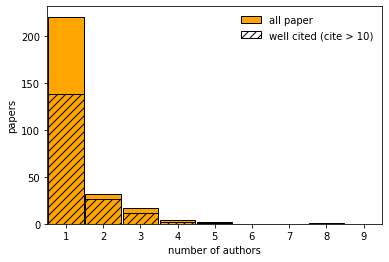

In [564]:
bins = list(range(1,10))
plot_kwargs = {'width': 0.95}
h = np.histogram(nauthors, bins = bins)
h_wc = np.histogram(nauthors_wellcited, bins = bins)
plt.bar(h[1][:-1], h[0], fc='orange', ec='black', label=r'all paper', **plot_kwargs)
plt.bar(h_wc[1][:-1], h_wc[0], fc='None', ec='black', hatch='///', label=r'well cited (cite > 10)', **plot_kwargs)
plt.legend(loc='upper right',frameon=False)
plt.xlabel(r'number of authors')
plt.xticks(bins)
plt.xlim(0.5,9.5)
plt.ylabel(r'papers')

## We can get a nice latex friendly list of your records

In [565]:
print(SW.nice_publication_list(latex_itemize=True, split_peer_review=True))

\textbf{Peer-reviewed publications}
\begin{enumerate}
\item On the Development of Effective Field Theory, Weinberg, Eur.Phys.J.H 46 (2021) 1 6, 2021, arXiv:2101.04241 [hep-th], [citations: 10].
\item Massless particles in higher dimensions, Weinberg, Phys.Rev.D 102 (2020) 9 095022, 2020, arXiv:2010.05823 [hep-th], [citations: 10].
\item Models of Lepton and Quark Masses, Weinberg, Phys.Rev.D 101 (2020) 3 035020, 2020, arXiv:2001.06582 [hep-th], [citations: \textbf{15}].
\item Absorption of Gravitational Waves from Distant Sources, Flauger, Weinberg, Phys.Rev.D 99 (2019) 12 123030, 2019, arXiv:1906.04853 [hep-th], [citations: 7].
\item Soft Bremsstrahlung, Weinberg, Phys.Rev.D 99 (2019) 7 076018, 2019, arXiv:1903.11168 [astro-ph.GA], [citations: 4].
\item Essay: Half a Century of the Standard Model, Weinberg, Phys.Rev.Lett. 121 (2018) 22 220001, 2018, [citations: \textbf{14}].
\item Gravitational Waves in Cold Dark Matter, Flauger, Weinberg, Phys.Rev.D 97 (2018) 12 123506, 2017, arXiv:1